# Capstone Project: Mercedes-Benz Greener Manufacturing

**DESCRIPTION**

This is a gradable project.

Reduce the time a Mercedes-Benz spends on the test bench.

**Problem Statement Scenario:**
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for
important automotive innovations. These include the passenger safety cell with the crumple zone, the
airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year,
making the brand the European leader among premium carmakers. Mercedes-Benz cars are leaders
in the premium car industry. With a huge selection of features and options, customers can choose
the customized Mercedes-Benz of their dreams.
To ensure the safety and reliability of every unique car configuration before they hit the road,
Daimler’s engineers have developed a robust testing system. As one of the world’s biggest
manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.
However, optimizing the speed of their testing system for many possible feature combinations is
complex and time-consuming without a powerful algorithmic approach.
You are required to reduce the time that cars spend on the test bench. Others will work with a
dataset representing different permutations of features in a Mercedes-Benz car to predict the time it
takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon
dioxide emissions without reducing Daimler’s standards.

**Following actions should be performed:**

● If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

● Check for null and unique values for test and train sets

● Apply label encoder.

● Perform dimensionality reduction.

● Predict your test_df values using xgboost


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import time
import operator 


## Loading the Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

df_train = train
df_test = test
print('Size of train set: {} rows and {} columns'.format(*df_train.shape))
print('Size of test set : {} rows and {} columns'.format(*df_test.shape))

Size of train set: 4209 rows and 378 columns
Size of test set : 4209 rows and 377 columns


In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [6]:
# If any feature has the same value in each row, it is considered an unhelpful feature.
unhelpful_features = []
for feature in train:
    if max(train[feature]) == min(train[feature]):
        print(feature)
        unhelpful_features.append(feature)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


# **If any column variance is equal to zero, then remove those variable(s).**

The variance will be zero if all the values are same. so we need to check if the min value in the col is equal to the max value in the col

In [7]:
# If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
#train.var(axis=0).head(10)
#train.var(axis=0) > 0

train.drop(train.var()[train.var() > 0].index.values, axis=1).head()

,X0,X1,X2,X3,X4,X5,X6,X8,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,k,v,at,a,d,u,j,o,0,0,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0


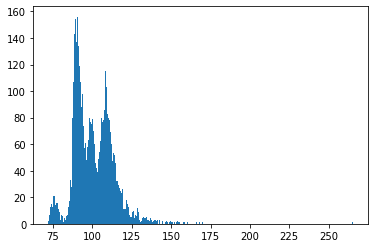

In [8]:
# To detect any outliers, plot the y values.
plt.hist(train.y, bins = 300)
plt.show()

In [9]:
print(sum(train.isnull().values, 0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


# **Label Encoder**

# **Dimensionality Reduction ** 

In [10]:
## Importing the data as some data-dimensions is lost on execution of the below  
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

df_train = train
df_test = test
print('Size of train set: {} rows and {} columns'.format(*df_train.shape))
print('Size of test set : {} rows and {} columns'.format(*df_test.shape))
print('Size of train set: {} rows and {} columns'.format(*train.shape))
print('Size of test set : {} rows and {} columns'.format(*test.shape))

Size of train set: 4209 rows and 378 columns
Size of test set : 4209 rows and 377 columns
Size of train set: 4209 rows and 378 columns
Size of test set : 4209 rows and 377 columns


 **Label Encoder**

In [11]:
# removing the outlier
train = train.loc[train['y'] < 170, :]

# seperating label and features
y_train = train['y']
train = train.drop('y', axis=1)

from sklearn.preprocessing import LabelEncoder

# label encoding the categorical features for dimension reduction
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

** Principal Component Analysis [PCA]**

In [12]:
## **** Principal Component Analysis [PCA] ***
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(train)
pca2_results_test = pca.transform(test)

dim_reds = list()
train_pca = pd.DataFrame()
test_pca = pd.DataFrame()

## Multiple Analysis results to list()
for i in range(1, n_comp + 1):
    train_pca['pca_' + str(i)] = pca2_results_train[:, i - 1]
    test_pca['pca_' + str(i)] = pca2_results_test[:, i - 1]

# **Xgboost**

In [13]:
print('Size of df_train set: {} rows and {} columns'.format(*df_train.shape))
print('Size of df_test set : {} rows and {} columns'.format(*df_test.shape))
print('Size of train set: {} rows and {} columns'.format(*train.shape))
print('Size of test set : {} rows and {} columns'.format(*test.shape))

Size of df_train set: 4209 rows and 378 columns
Size of df_test set : 4209 rows and 377 columns
Size of train set: 4208 rows and 377 columns
Size of test set : 4209 rows and 377 columns


In [14]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print('Size of train set: {} rows and {} columns'.format(*df_train.shape))
print('Size of test set : {} rows and {} columns'.format(*df_test.shape))

#df_train = train
#df_test = test 

usable_columns = list(set(df_train.columns) - set(['ID', 'y']))

y_train = df_train['y'].values
id_test = df_test['ID'].values

x_train = df_train[usable_columns]
x_test = df_test[usable_columns]

for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1) # Column with only one value is useless so we drop it
        x_test.drop(column, axis=1)
    if cardinality > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
        
x_train.head()

Size of train set: 4209 rows and 378 columns
Size of test set : 4209 rows and 377 columns


L:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
L:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,X338,X305,X262,X254,X319,X294,X275,X26,X322,X109,...,X92,X281,X277,X3,X328,X169,X98,X24,X206,X261
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,97,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,101,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,99,1,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,102,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,102,1,0,1,0,0,0


In [15]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[09:24:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:99.1397	valid-rmse:98.2538	train-r2:-58.3426	valid-r2:-67.6247
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.1832	valid-rmse:80.2714	train-r2:-38.7928	valid-r2:-44.804
[20]	train-rmse:66.541	valid-rmse:65.5967	train-r2:-25.7332	valid-r2:-29.5876
[30]	train-rmse:54.6149	valid-rmse:53.6305	train-r2:-17.0092	valid-r2:-19.4459
[40]	train-rmse:44.9172	valid-rmse:43.8842	train-r2:-11.1814	valid-r2:-12.6899
[50]	train-rmse:37.0508	valid-rmse:35.9587	train-r2:-7.28831	valid-r2:-8.19158
[60]	train-rmse:30.6913	valid-rmse:29.5289	train-r2:-4.68723	valid-r2:-5.19837
[70]	train-rmse:25.5745	valid-rmse:24.3337	train-r2:-2.949	valid-r2:-3.20918
[80]	train-rmse:21.4844	valid-rmse:20.1551	train-r2:-1.78687	valid-r

# **Predict your test values using xgboost**

In [16]:
p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test
sub.head()

,ID,y
0,1,89.522064
1,2,105.298737
2,3,89.935326
3,4,77.471291
4,5,111.139229
